<a href="https://colab.research.google.com/github/forestschao/udl/blob/main/Notebooks/Chap06/e_6_4_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [6]:
def draw_function(x, phi_0, phi_1):
  y = sigmoid(phi_0 + phi_1 * x)

  fig, ax = plt.subplots()
  ax.plot(x, y, 'm-')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.show()

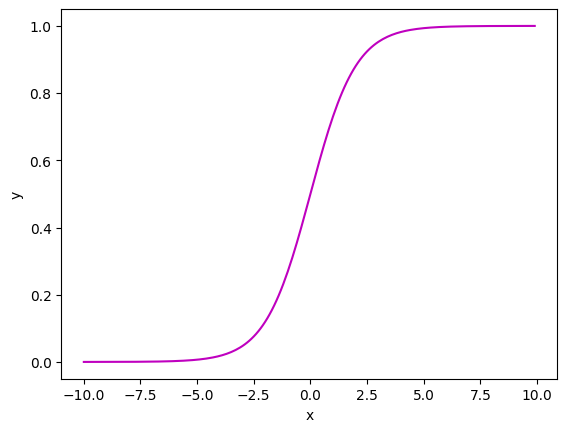

In [7]:
x = np.arange(-10, 10, 0.1)
phi_0 = 0
phi_1 = 1
draw_function(x, phi_0, phi_1)

In [30]:
def compute_loss(x, y, phi_0, phi_1):
  z = phi_0 + phi_1 * x
  l = sigmoid(z)

  epsilon = 1e-9
  l = np.clip(l, epsilon, 1-epsilon)

  loss = -np.sum((1-y) * np.log(1-l) + y * np.log(l))
  return loss

In [28]:
# Data Generation
np.random.seed(1)
I = 10
X0 = np.random.normal(loc=-1, scale=1, size=I)
Y0 = np.zeros(I)
X1 = np.random.normal(loc=1, scale=1, size=I)
Y1 = np.ones(I)

X = np.concatenate([X0, X1])
Y = np.concatenate([Y0, Y1])

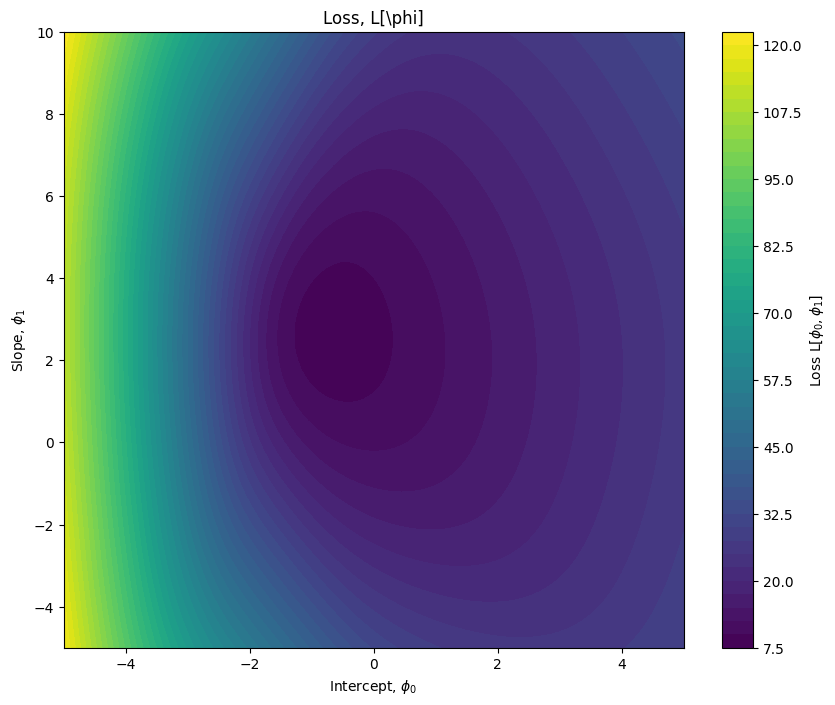

In [34]:
phi0_range = np.linspace(-5, 5, 100)
phi1_range = np.linspace(-5, 10, 100)
loss_grid = np.zeros((100, 100))

# Compute loss at every point on the grid
for i, p0 in enumerate(phi0_range):
    for j, p1 in enumerate(phi1_range):
        loss_grid[i, j] = compute_loss(X, Y, p0, p1)

# Visualization
plt.figure(figsize=(10, 8))
plt.contourf(phi0_range, phi1_range, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label=r'Loss L[$\phi_0, \phi_1$]')
plt.xlabel(r'Intercept, $\phi_0$')
plt.ylabel(r'Slope, $\phi_1$')
plt.title(r'Loss, L[\phi]')
plt.show()